In [172]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup


In [173]:
starbucks_response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

In [174]:
starbucks_soup = BeautifulSoup(starbucks_response.content, "html.parser")

In [175]:
table = (starbucks_soup.find_all("table"))[0]
table

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Starbucks Stores 2023<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

In [176]:
rows = []

# iterate over all rows in the population table
for row in table.find_all("tr")[1:]:

  # State is found in <th>
  state = row.find("th").text

  # Number of locations is found in <td>
  locations_2023 = row.find_all("td")[0].get_text(strip = True)
  locations_2021 = row.find_all("td")[1].get_text(strip = True)
  locations_2024 = row.find_all("td")[2].get_text(strip = True)

  rows.append({
    "State": state,
    "2023": locations_2023,
    "2021": locations_2021,
    "2024": locations_2024
  })


In [177]:
starbucks = pd.DataFrame(rows)
starbucks.head()

,State,2023,2021,2024
0,California,"3,080","2,959","3,117"
1,Texas,"1,346","1,215","1,409"
2,Florida,844,786,892
3,Washington,741,739,736
4,New York,692,643,715


In [178]:
# Pivot Long
starbucks_pivot = starbucks.melt(id_vars=["State"], var_name='Year', value_name="Stores")

In [179]:
starbucks_pivot["Chain"] = "Starbucks"
starbucks_pivot.head()

,State,Year,Stores,Chain
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks


In [180]:
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
dunkin_soup = BeautifulSoup(dunkin_response.content, "html.parser")

In [181]:
table = (dunkin_soup.find_all("table"))[0]

In [182]:
rows = []

# iterate over all rows in the population table
for row in table.find_all("tr")[1:]:

  # State is found in <th>
  state = row.find("th").text

  # Number of locations is found in <td>
  
  locations_2024 = row.find_all("td")[0].get_text(strip = True)

  locations_2023 = row.find_all("td")[1].get_text(strip = True)

  rows.append({
    "State": state,
    "2024": locations_2024,
    "2023": locations_2023
  })

In [183]:
dunkin = pd.DataFrame(rows)
dunkin.head()

,State,2024,2023
0,New York,"1,431","1,414"
1,Massachusetts,"1,042","1,068"
2,Florida,909,883
3,New Jersey,872,866
4,Illinois,711,692


In [184]:
# Pivot Long
dunkin_pivot= dunkin.melt(id_vars=["State"], var_name='Year', value_name="Stores")
dunkin_pivot.head()

,State,Year,Stores
0,New York,2024,"1,431"
1,Massachusetts,2024,"1,042"
2,Florida,2024,909
3,New Jersey,2024,872
4,Illinois,2024,711


In [185]:
dunkin_pivot["Chain"] = "Dunkin Donuts"
dunkin_pivot.head()

,State,Year,Stores,Chain
0,New York,2024,"1,431",Dunkin Donuts
1,Massachusetts,2024,"1,042",Dunkin Donuts
2,Florida,2024,909,Dunkin Donuts
3,New Jersey,2024,872,Dunkin Donuts
4,Illinois,2024,711,Dunkin Donuts


In [186]:
merged_data = pd.concat([starbucks_pivot, dunkin_pivot], ignore_index=True)
merged_data.head()


,State,Year,Stores,Chain
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks


In [187]:
population_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
population_soup = BeautifulSoup(population_response.content, "html.parser")

In [188]:
table = (population_soup.find_all("table"))[0]

In [189]:
rows = []

# iterate over all rows in the population table
for row in table.find_all("tr")[1:]:

  # State is found in <th>
  state = row.find_all("td")[2].get_text(strip = True)

  # Number of locations is found in the select column of <td>
  population = row.find_all("td")[3].get_text(strip = True)

  rows.append({
    "State": state,
    "Population": population
  })  

In [190]:
population = pd.DataFrame(rows)
population.head()

,State,Population
0,California,"39,538,223"
1,Texas,"30,145,505"
2,Florida,"21,538,187"
3,New York,"20,201,249"
4,Pennsylvania,"13,002,700"


In [191]:
merged_data2 = pd.merge(merged_data,population, on="State")
merged_data2.head()

,State,Year,Stores,Chain,Population
0,California,2023,"3,080",Starbucks,"39,538,223"
1,Texas,2023,"1,346",Starbucks,"30,145,505"
2,Florida,2023,844,Starbucks,"21,538,187"
3,Washington,2023,741,Starbucks,"7,705,281"
4,New York,2023,692,Starbucks,"20,201,249"


In [192]:
revenue = pd.DataFrame({
    'Year'  : ["2024", "2023", "2021", "2024", "2023"],
    "Chain" : ["Starbucks","Starbucks", "Starbucks", "Dunkin Donuts", "Dunkin Donuts"],
    "Revenue" : [36.2, 35.98, 29.06, 1.81, 1.4]
    })

In [193]:
merged_data3 = pd.merge(merged_data2, revenue, on=['Year', 'Chain'])
merged_data3.head()

,State,Year,Stores,Chain,Population,Revenue
0,California,2023,"3,080",Starbucks,"39,538,223",35.98
1,Texas,2023,"1,346",Starbucks,"30,145,505",35.98
2,Florida,2023,844,Starbucks,"21,538,187",35.98
3,Washington,2023,741,Starbucks,"7,705,281",35.98
4,New York,2023,692,Starbucks,"20,201,249",35.98


In [194]:
regions = pd.DataFrame({
    'State': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
        'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
        'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
        'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'
    ],
    'Region': [
        'South', 'West', 'West', 'South', 'West', 'West', 'Northeast', 
        'South', 'South', 'South', 'West', 'West', 'Midwest', 'Midwest', 
        'Midwest', 'Midwest', 'South', 'South', 'Northeast', 'South', 
        'Northeast', 'Midwest', 'Midwest', 'South', 'Midwest', 'West', 
        'Midwest', 'West', 'Northeast', 'Northeast', 'West', 'Northeast',
        'South', 'Midwest', 'Midwest', 'South', 'West', 'Northeast', 
        'Northeast', 'South', 'Midwest', 'South', 'South', 'West', 
        'Northeast', 'South', 'West', 'South', 'Midwest', 'West'
    ]
})

In [195]:
merged_data4 = pd.merge(merged_data3, regions, on='State')
merged_data4.head()


,State,Year,Stores,Chain,Population,Revenue,Region
0,California,2023,"3,080",Starbucks,"39,538,223",35.98,West
1,Texas,2023,"1,346",Starbucks,"30,145,505",35.98,South
2,Florida,2023,844,Starbucks,"21,538,187",35.98,South
3,Washington,2023,741,Starbucks,"7,705,281",35.98,West
4,New York,2023,692,Starbucks,"20,201,249",35.98,Northeast


In [196]:

merged_data4['Stores'] = pd.to_numeric(merged_data4['Stores'].str.replace(',', ''), errors='coerce').astype('Int64')
merged_data4['Population'] = pd.to_numeric(merged_data4['Population'].str.replace(',', ''), errors='coerce').astype('Int64')


In [197]:
stores_2023 = merged_data4[merged_data4["Year"] == '2023']


In [198]:
# Drop rows where 'Stores' or 'Population' are missing
stores_2023_clean = stores_2023.dropna(subset=['Stores', 'Population'])

# Step 1: Calculate the total population and stores per region for regional People per Store
region_population = stores_2023_clean.groupby('Region')['Population'].sum()
region_stores = stores_2023_clean.groupby('Region')['Stores'].sum()
region_summary = pd.DataFrame({
    'Population': region_population,
    'Stores': region_stores,
    'People_per_Store_Region': region_population / region_stores
}).reset_index()

chain_summary = stores_2023_clean.groupby(['Region', 'Chain']).agg({
    'Population': 'sum',
    'Stores': 'sum'
}).reset_index()

chain_summary['People_per_Store_Chain'] = chain_summary['Population'] / chain_summary['Stores']

chain_summary['People_per_Store_Chain'] = chain_summary['People_per_Store_Chain'].round(2)

chain_summary.merge(region_summary[['Region']], on='Region')


,Region,Chain,Population,Stores,People_per_Store_Chain
0,Midwest,Dunkin Donuts,68985454,1398,49345.82
1,Midwest,Starbucks,68985454,2468,27951.97
2,Northeast,Dunkin Donuts,57609148,5043,11423.59
3,Northeast,Starbucks,57609148,1800,32005.08
4,South,Dunkin Donuts,126576562,2557,49501.98
5,South,Starbucks,126576562,4462,28367.67
6,West,Dunkin Donuts,78588572,363,216497.44
7,West,Starbucks,78588572,5923,13268.37


Looking at this table, I can conclude there are the most Starbucks locations in the West region. There are also the least amount of people per Starbucks Store in the West region. I can also conclude there are the most Dunkin Donuts locations in the Northeast region, with the least amount of people per Dunkin Stores in the Northeast region. Starbucks Dominates the West, Midwest, and the South regions, whereas Dunkin Donuts is the King in the Northeast region. 

In [199]:
import pandas as pd

stores_2023_clean = stores_2023.dropna(subset=['Stores', 'Population', 'Revenue'])

chain_summary = stores_2023_clean.groupby('Chain').agg({
    'Stores': 'sum',    
    'Revenue': 'first'        
}).reset_index()

chain_summary['Revenue_Per_Store'] = chain_summary['Revenue'] / chain_summary['Stores']

chain_summary['Revenue_Per_Store'] = chain_summary['Revenue_Per_Store']

print("\nRevenue per Store Summary:")
print(chain_summary[['Chain', 'Stores', 'Revenue', 'Revenue_Per_Store']])



Revenue per Store Summary:
           Chain  Stores  Revenue  Revenue_Per_Store
0  Dunkin Donuts    9361     1.40            0.00015
1      Starbucks   14653    35.98           0.002455


Revenue per Store Summary:
           Chain  Stores  Revenue  Revenue_Per_Store
0  Dunkin Donuts    9361     1.40            0.00015
1      Starbucks   14653    35.98           0.002455


I used ChatGPT to help me generate this table showing the Revenue for the two chains in 2023. This table shows the breakdown of the Revenue per store. Starbucks generated about $2.5 million in 2023 per store. Dunkin' generated about $150,000 per store per year. THis shows that Starbucks generated significanly more per store but this may be due to revenue streams other than sales from in person stores.

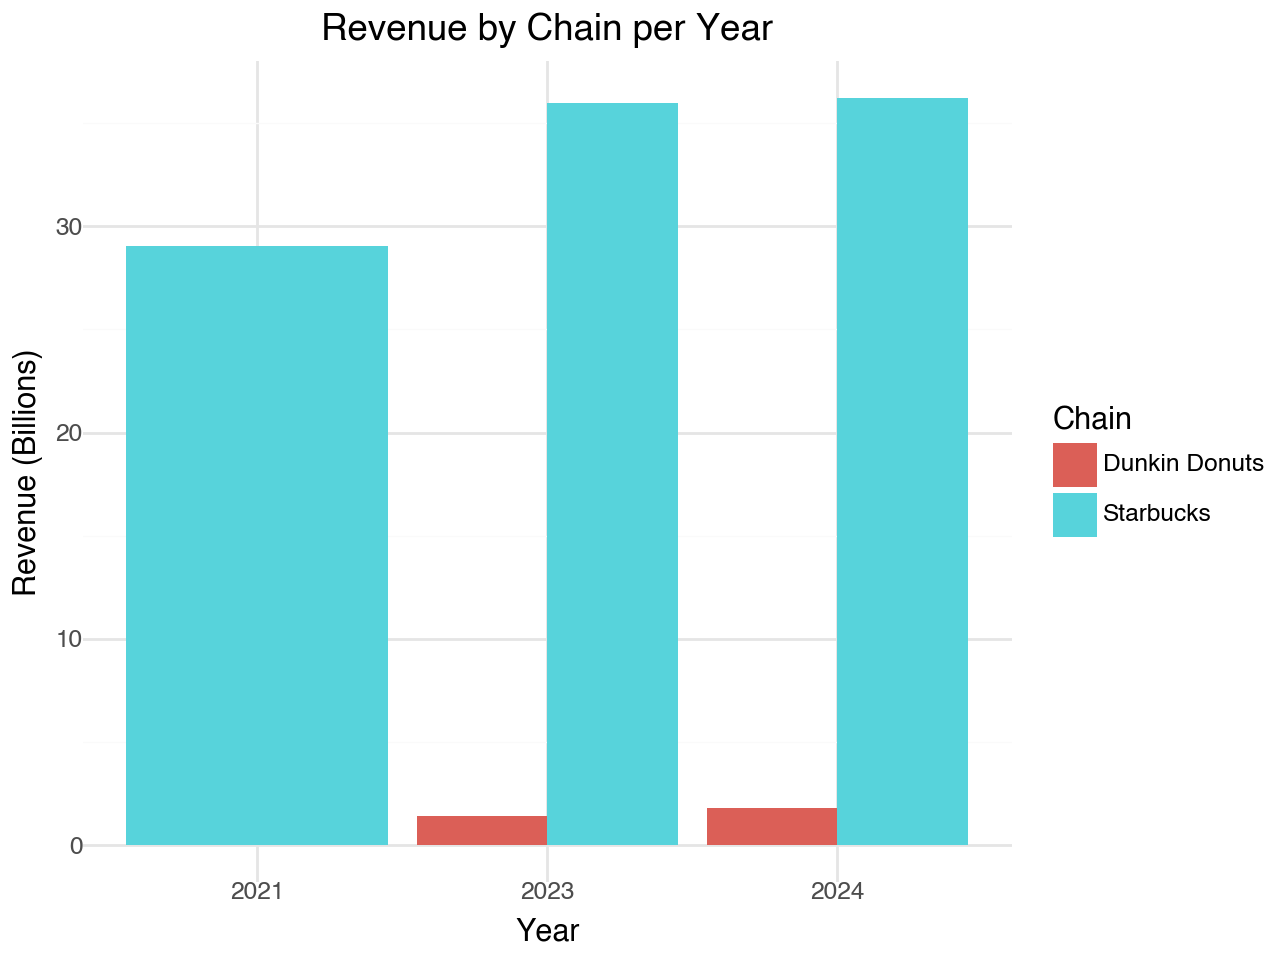

In [200]:
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs

(
    ggplot(merged_data4, aes(x='Year', y='Revenue', fill='Chain'))
    + geom_bar(stat='identity', position='dodge')
    + theme_minimal()
    + labs(title='Revenue by Chain per Year', x='Year', y='Revenue (Billions)')
)



Starbucks consistently has much higher revenue than Dunkin' Donuts across all three years. This is indicated by the significantly taller bars for Starbucks. The revenue for Starbucks appears fairly stable across the three years, with little noticeable change from 2021 to 2024. Dunkin' Donuts' revenue is minimal compared to Starbucks, with slight increases in 2023 and 2024, but it remains substantially lower. While Starbucks shows a steady pattern, Dunkin' Donuts’ revenue appears to have small incremental growth each year, suggesting a gradual increase.

In [201]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_store_locations(url):
    company_name = url.split("/")[-1].split("-")[0].capitalize()

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    table = soup.find("table")
    
    headers = [th.text.strip() for th in table.find_all("th")]
    
    data = []
    
    rows = table.find_all("tr")[1:] 
    for row in rows:
        cells = row.find_all("td")
        
        if cells:
            state = row.find("th").text.strip()
            locations = cells[0].text.strip().replace(",", "") 
            data.append([state, int(locations)])
    
    df = pd.DataFrame(data, columns=[headers[0], headers[1]])
    
    return df, company_name



In [202]:
url = "https://worldpopulationreview.com/state-rankings/walmart-stores-by-state"
df, company_name = scrape_store_locations(url)
df

,State,# of Stores
0,Texas,517
1,Florida,341
2,California,280
3,North Carolina,192
4,Georgia,189
5,Illinois,161
6,Ohio,146
7,Missouri,137
8,Tennessee,137
9,Pennsylvania,134
